# **Numeric/Categorical Bivariate Analysis**

Learning Outcomes:

LO 1: Students will be able to select, run, and interpret univariate and bivariate statistical analyses and visualizations.


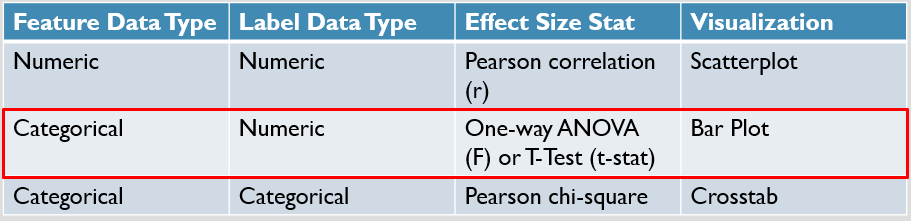

In [1]:
import pandas as pd
df = pd.read_csv('https://www.dropbox.com/s/puruptejplzhts5/insurance.csv?dl=1')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#  
# 
# Nominal groups = by name only
# Ordinal groups = can be ordered


# kde = kernel density estimation

# **T-Test**

**Two sample t-test**: used to determine whether or not the means of ***two*** populations are equal. For instance, is there a difference between the mean insurance charges for females and the mean insurance charges for males.

The effect size of a t-test is the t stat. It also has a corresponding p-value.

**Null hypothesis:** The two population means are equal

**Alternative hypothesis:** The two population means are **not** equal (i.e., there is a difference between the two and that has some impact on the label)

If the p-value is < 0.05, we reject the null hypothesis and accept the alternative hypothise. If the p-value is < 0.05, the two population means are **not** equal and that feature does have an impact on the label.



Is there a statistically significant difference in average *charges* between *males* and *females*? What is the effect size?

In [2]:
from scipy import stats

male = df[df['sex'] == 'male']
female = df[df['sex'] == 'female']

t, p = stats.ttest_ind(male.charges, female.charges)
print("t: " + str(round(t, 3)))
print("p: " + str(round(p, 3)))

t: 2.098
p: 0.036


<Axes: xlabel='charges', ylabel='Count'>

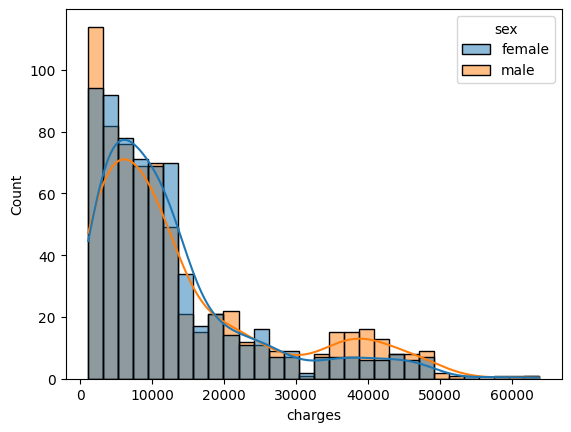

In [6]:
import seaborn as sns

sns.histplot(data=df, x='charges', kde=True, hue='sex')



Yes, there is a statistically significant difference in average charges between males and females. We know this because the p-value is less than .05. There is a difference between average insurance charges for males and average insurance charges for females.

The effect size is 2.098. The larger the t-score, the more difference there is between groups. The smaller the t-score, the more similarity there is between groups.

Notice the t-statistic is positive. This means that the first value we entered (male) has a higher insurance charges than the second value we entered (female).



# **Practice #1 - TTest**

Is there a statistically significant difference in *charges* between *smokers* and *non-smokers*? What is the effect size?

t: 46.665
p: 0.0


<Axes: xlabel='charges', ylabel='Count'>

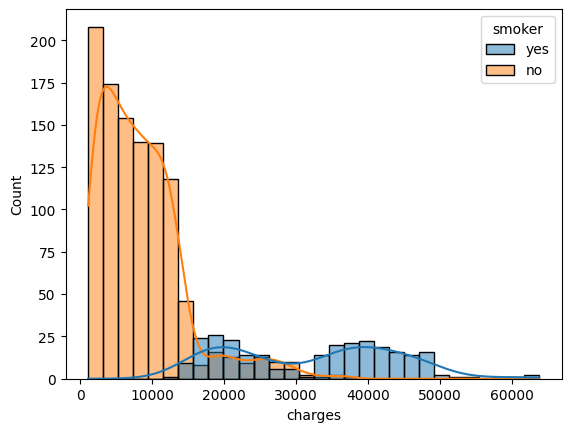

In [8]:
from scipy import stats

smokie = df[df['smoker'] == 'yes']
nonsmokie = df[df['smoker'] == 'no']

t, p = stats.ttest_ind(smokie.charges, nonsmokie.charges)
print("t: " + str(round(t, 3)))
print("p: " + str(round(p, 3)))

import seaborn as sns

sns.histplot(data=df, x='charges', kde=True, hue='smoker')


# **ANOVA**

One-Way ANOVA: used to determine whether or not there is a statistically significant difference between the means of ***three or more*** independent groups. For example, does the region you live in play a part in your insurance charges?

The effect size is the F test statistic. It also has a corresponding p-value.

**Null Hypothesis**: all population means are equal

**Alternative hypothesis**: at least one population mean is different from the rest

If the p-value is < 0.05, we reject the null hypothesis and accept the alternative hypothesis. If the p-value is < 0.05, at least one population mean is different from the rest (i.e., that feature has an impact on the label).

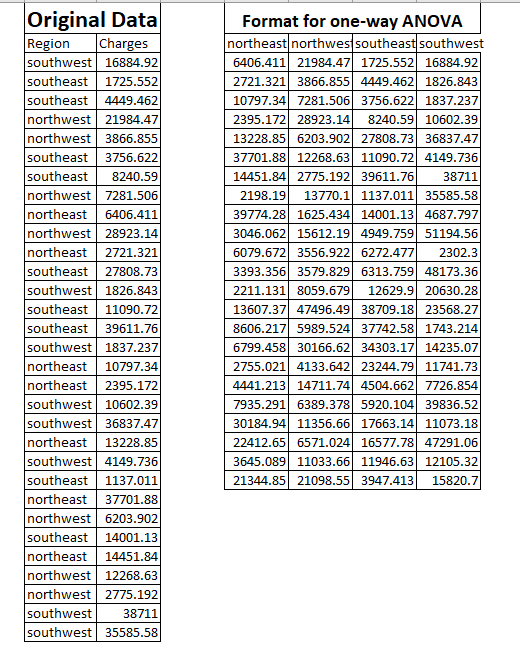

**ANOVA - Example 1**

Is there a statistically significant difference in average insurance charges between the different regions?

In [9]:
southwest = df[df['region'] == 'southwest']
northwest = df[df['region'] == 'northwest']
northeast = df[df['region'] == 'northeast']
southeast = df[df['region'] == 'southeast']

f, p = stats.f_oneway(southwest.charges, northwest.charges, northeast.charges, southeast.charges)

print('\nF:'+str(f))
print('p:'+str(p))



F:2.9696266935891193
p:0.0308933560705201


There is a statistically significant difference across all the mean charges of the regions. We know this becauase the p-value is less than 0.05.

**ANOVA - Example 2 - More Optimized**

In [ ]:
groups = df['region'].unique()  #Filter to all the unique regions (northwest, southeast, northwest, southwest)
group_labels = []               #Create an empty list that will be a two-dimensional list of lists to store the label values associated with each category
for g in groups:                #Loop through each unique region
  group_labels.append(df[df['region'] == g]['charges'])  #add to the group_labels list the charges for that region
f, p =  stats.f_oneway(*group_labels) #perform a one way anova on all the regions. *group_labels is a shortcut way of listing out each of the regions.

print('F: ' + str(round(f, 4)))
print('p: ' + str(round(p, 4)))

# **Tukey's Test**

Tukey's Honestly Significant Difference (HSD): A test performed after ANOVA ( a post-hoc test) that compares all the pairs of group values. It minimizes the likelihood of a Type 1 error by calculating an adjusted p-value that is more conservative than that achieved by a regular t-test.

Type 1 error: A type of statistical error that occurs when the null hypothesis is rejected, when in fact, it is true.

**Null hypothesis:** The two population means are equal

**Alternative hypothesis:** The two population means are **not** equal

If the reject column is 'True', that means you should reject the null hypothesis and accept the alternative hypothesis (the two population means are not equal). This means the difference between the two populations does have an impact on that label.

If the reject column is 'False', that means you should accept the null hypothesis (the two population means are equal). There is no difference in impact on the label between those two population.

In [10]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['charges'],
                          groups=df['region'],
                          alpha=0.05)

print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -988.8091 0.7245 -3428.9343 1451.3161  False
northeast southeast  1329.0269 0.4745 -1044.9417 3702.9955  False
northeast southwest -1059.4471 0.6792 -3499.5723 1380.6781  False
northwest southeast  2317.8361 0.0583   -54.1994 4689.8716  False
northwest southwest    -70.638 0.9999 -2508.8826 2367.6066  False
southeast southwest -2388.4741 0.0477 -4760.5096  -16.4386   True
-----------------------------------------------------------------


While, there is a statistically significant difference in insurance charges means between the regions overall, we can't say what region's specifically have statistically significant means from each other until we do Tukey's test.

Only one pair (SE and SW) have an adjusted p-value of less than 0.05. In that case we can reject the null hypothesis and say there is a statistically significant difference in insurance charges between the SE and SW region.

The other pairs don't have an adjusted p-value of less than 0.05, so we accept the null hypothesis. We can NOT say that there is a statistically significant difference between those individual group's insurance charges.

# **Bar Plots**

Create a visualization that shows insurance charges by region and if they smoke or not. What insights can you draw?

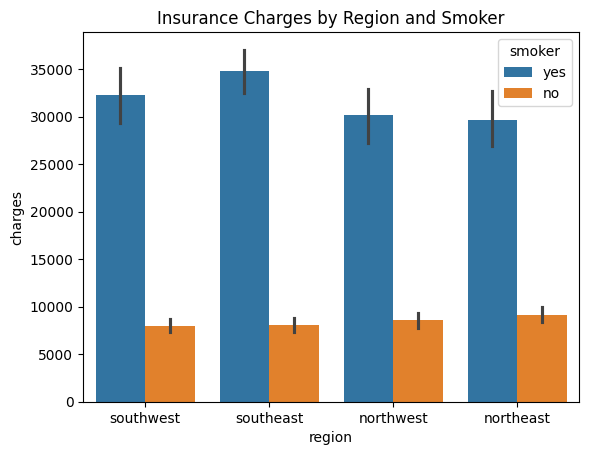

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df)

plt.title('Insurance Charges by Region and Smoker')
plt.show()

# **You Try - Put it all together**

According to the World Health Organization (WHO) strokes are the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get a stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

This dataset is taken from [kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset). It has been cleaned to ensure each pair has enough sample data and the stroke variable was transformed into a categorical variable.


1. Create a visualization that shows the average glucose levels by stroke status and residence type (color). What insights can you draw?

2. Is there a statistically significant difference in average glucose levels among those that had a stroke and those that didn't?

3. Is there a statistically significant difference in average glucose levels among the residence types?

4. Is there a statistically significant difference in average glucose levels among the different smoking statuses? Run the post-hoc test too.

5. Create a pivot table that shows the average glucose levels for all combinations of stroke status and smoking status. What insights can you draw?

In [ ]:
df2 = pd.read_csv('https://www.dropbox.com/s/m7cuv5yw9o2cvps/healthcare-dataset-stroke-data-cat.csv?dl=1')
df2.head()

1. Create a visualization that shows the average glucose levels by stroke status and residence type (color). What insights can you draw?

2. Is there a statistically significant difference in average glucose levels among those that had a stroke and those that didn't?

3. Is there a statistically significant difference in average glucose levels among the residence types?

4. Is there a statistically significant difference in average glucose levels among the different smoking statuses? Run the post-hoc test too.

5. Create a pivot table that shows the average glucose levels for all combinations of stroke status and smoking status. What insights can you draw?